# (1) Introduction
One thing this pandemic has thought me was how reliant humanity is on technology from ordering products to assisting people in their professions. Due to the lack of hospital facilities around the world, I firmly believe that it is high time that we enhance our equipment to satisfy the mass amount of patients overflowing the hospitals every day. It is during times like these we realise that despite how advanced we become we are never prepared. Hence I am introducing my latest project in the advancement of **computer vision**, one that not only detects values to the highest precision but also generates results in the quickest. I am talking about the YOLO algorithm. For those of you who are unfamiliar don't look at me funny, we will discuss this in more detail. This isn't a solution to replacing doctors or the field of radiology, this algorithm is quite useless **for real purposes** * this algorithm just about shows how accurate I can derive the results for lungs with and without Pneumonia. That's right, this project is targeted in finding Pneumonia -like symptoms in the X-ray of the lungs and what it generates a value either 1 or 0 with **1 being has pneumonia** and **0 being doesn't have Pneumonia**. Okay now that we are clear that what this is intended for, let's look at the dataset shall we?


---

## (1)(a) The Dataset
As usual, the dataset is split into the training and the test set, but instead of being in an excel sheet, as all the data is images, the dataset is in a folder here is the architecture

|   File Path    | Description |
| ----------- | ----------- |
| train\NORMAL      | 1,342 images containing X-rays of normal lungs for training     |
| train\PNEUMONIA   | 3,876 images containing X-rays of lungs with pneumonia for training        |
| test\NORMAL      | 234  images containing X-rays of normal lungs for validation     |
| test\PNEUMONIA   | 390 images containing X-rays of lungs with pneumonia for validation       |


---
Before we enter the training let's explain some concepts based on convolutional neural networks and eventually the YOLO algorithm.


# (2) Convolutional Neural Networks (An Intuition)
The Convolutional Neural Network or CNN for short is an algorithm that is used in the image processing side of machine learning. This algorithm is basically an Artificial Neural Network that has **extra layers on top of it** that helps **process the images** in order for it to be compatible for the fully connected layer. You can click [here](https://github.com/codemasterady/Phone-Price-Predictor/blob/main/About_The_Model.ipynb) if you are unfamiliar with Artificial Neural Networks which will guide you to the notebook I have written about ANNs. Anyways now that we have a general idea, let's look into CNNs in more detail.

## (2)(a) The Convolution Layer
This is the first layer the image goes through. This layer scans the image for some certain features using a feature-detector which is usually termed as a **filter** and using those filters it scans for certain features from the images that differentiate it from others. In the example of detecting pneumonia in the lungs, this model will scan the entire image and would try to separate any similarity between those images i.e what **features** do these images have in common. Using that knowledge, it can generate these filters. After this layer, the filters are sent to the pooling layer. Below is an image of the convolution layer and how it works.



---


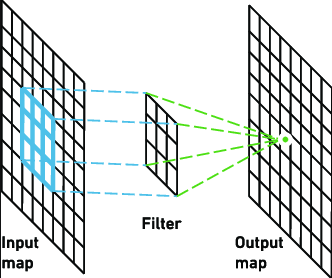

## (2)(b) The Pooling Layer
This layer is used to further extract the features from the feature detector by separating the features of the image from the background. The concept of ignoring the background noise is known as **Spatial Invariance**. This is a useful step as it not only **reduces computational time** but also improves the accuracy of the model. This layer is usually followed up with another Convolutional layer. There are different types of poolings but the ones we will be using is known as [***Max-Pooling***](https://computersciencewiki.org/index.php/Max-pooling_/_Pooling#:~:text=Max%20pooling%20is%20a%20sample,in%20the%20sub%2Dregions%20binned.). This is the process in which the maximum value of the pixel within a defined window size, specified by the developer, is used in building another "filter-like" structure. There are many other pooling methods such as taking the **average, summation of, median** etc. Below is a pictographic representation of the pooling process.


---

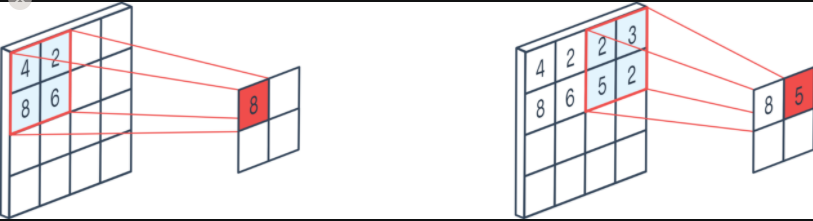